In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("advertising.csv")

print("Dataset Structure:")
print(data.info())  
print("\nFirst 5 Rows:")
print(data.head())  # Display the first 5 rows

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

First 5 Rows:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [3]:
# Check for missing values
print(data.isnull().sum())

# Drop missing rows (if applicable)
data = data.dropna()

# Separate features (X) and target (y)
X = data.drop(columns=["Sales"])  # Features
y = data["Sales"]  # Target


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 2.9077569102710896
R-squared Score: 0.9059011844150826


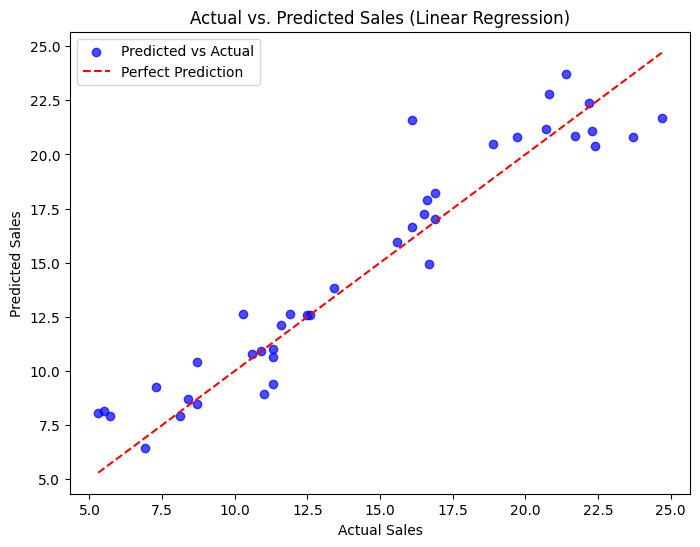

In [6]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted sales
plt.figure(figsize=(8, 6))

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')

# Plot the diagonal line (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Linear Regression)")
plt.legend()

plt.show()
